# Импорт библиотек

In [1]:
library(psych)
library(ggplot2)
library(scales)
library(dplyr)


Присоединяю пакет: 'ggplot2'


Следующие объекты скрыты от 'package:psych':

    %+%, alpha



Присоединяю пакет: 'scales'


Следующие объекты скрыты от 'package:psych':

    alpha, rescale



Присоединяю пакет: 'dplyr'


Следующие объекты скрыты от 'package:stats':

    filter, lag


Следующие объекты скрыты от 'package:base':

    intersect, setdiff, setequal, union




# Работа с данными

## Чтение данных

In [2]:
df <- read.csv("Data/forFBpost.csv", sep = ';')

In [3]:
# Переименуем колонки (Чтобы были в одном стиле)
names(df) <- c("City", "Year", "Fact", "Model", "Low_bound", "High_bound")

In [4]:
head(df, 5)

,City,Year,Fact,Model,Low_bound,High_bound
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,Белокуриха,2000,NA,15400,15100,15700
2,Белокуриха,2001,NA,15400,15100,15700
3,Белокуриха,2002,NA,15400,15000,15700
4,Белокуриха,2003,NA,15300,15000,15700
5,Белокуриха,2004,NA,15300,14900,15600


## Описание данных

In [5]:
# Типы данных
str(df)

'data.frame':	30250 obs. of  6 variables:
 $ City      : chr  "Белокуриха" "Белокуриха" "Белокуриха" "Белокуриха" ...
 $ Year      : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...
 $ Fact      : int  NA NA NA NA NA NA NA NA 14781 14781 ...
 $ Model     : num  15400 15400 15400 15300 15300 15200 15100 15000 14900 14800 ...
 $ Low_bound : num  15100 15100 15000 15000 14900 14800 14700 14600 14600 14500 ...
 $ High_bound: num  15700 15700 15700 15700 15600 15500 15400 15300 15200 15100 ...


In [6]:
# Размер df
cat("Кол-во строк в df = ", dim(df)[1],
    "\nКол-во столбцов в df = ", dim(df)[2])

Кол-во строк в df =  30250 
Кол-во столбцов в df =  6

In [7]:
# Кол-во лет, на которые опираются данные (прошлое-будущее)
unique_years <- unique(df$Year)
cat("Данные представлены за промежуток от ", unique_years[1],
    "года до ", tail(unique_years, 1), "года.")

Данные представлены за промежуток от  2000 года до  2120 года.

In [8]:
# Считаем кол-во пропусков в данных для каждой переменной
print(sapply(df, function (x) sum(is.na(x))))

      City       Year       Fact      Model  Low_bound High_bound 
         0          0      27000          0          0          0 


В столбце **Fact** (фактическая численность населения города) имеется *27000* пропусков (NA).  
Пропусков много, так что можно:
1. Либо заменить их на $fact = mean(Верхняя.граница - Нижняя.граница)$;
2. Либо заменить $fact = median(Верхняя.граница - Нижняя.граница)$.

In [9]:
# Город с максимальной фактической численностью населения
subset(df, Fact == max(df$Fact, na.rm = T))[, c(1:3)]

,City,Year,Fact
,<chr>,<int>,<int>
15751,Москва,2020,12678079


In [10]:
# Город с минимальной фактической численностью населения
subset(df, Fact == min(df$Fact, na.rm = T))[, c(1:3)]

,City,Year,Fact
,<chr>,<int>,<int>
7874,Плес,2008,2370
7875,Плес,2009,2370
7876,Плес,2010,2370


Для работы с настоящим оставим только данные с 2000 - 2023

In [11]:
# Для работы с настоящим оставим только данные с 2000 - 2023
present_df <- subset(df, Year %in% 2000:2023)

Заполним пропуски населения средними значениями = (High_bound - Low_bound)

In [12]:
# Заменим пропуски на средние значения
res <- (present_df$Low_bound + present_df$High_bound) / 2
present_df$Fact <- ifelse(is.na(present_df$Fact), res, present_df$Fact)

# Визуализация данных

In [13]:
# Общая тема оформления для графиков
my_theme <- theme(plot.title = element_text(size = 20, face = "bold"),
                  axis.title.y = element_text(size = 14),
                  axis.title.x = element_text(size = 14),
                  axis.text.x = element_text(size = 10),
                  axis.text.y = element_text(size = 10))

## Топ 10 самых населенных городов

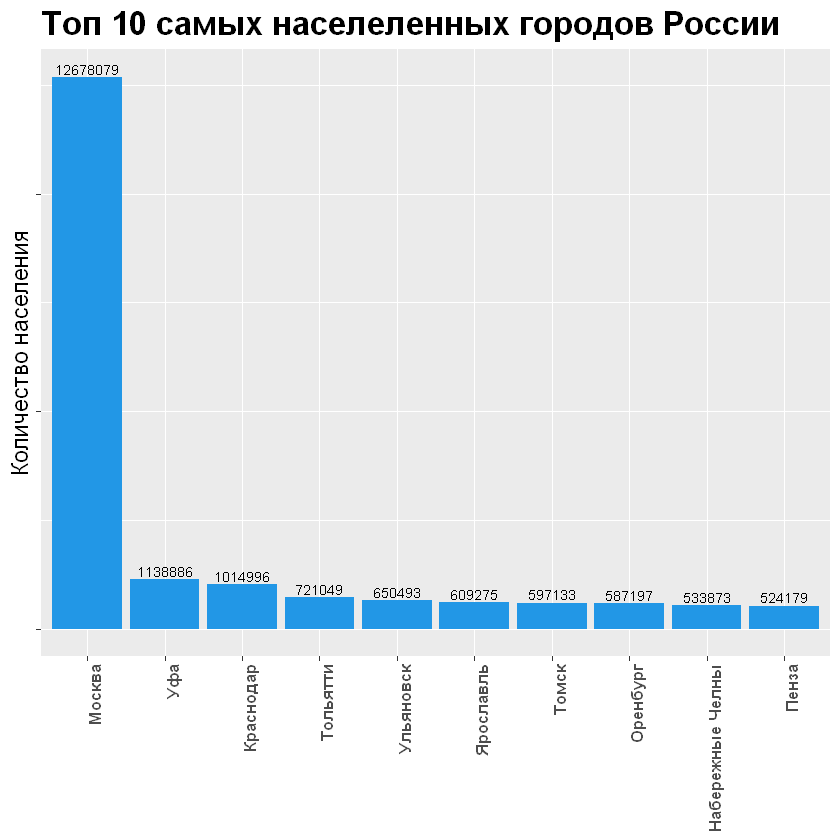

In [14]:
# Топ 10 самых больших городов
res <- aggregate(Fact ~ City, df, FUN = max)
res <- res[order(res$Fact, decreasing = T), ][1:10, ]; names(res)[2] <- "Fact"

ggplot(res, aes(x = reorder(City, -Fact),
                y = Fact)) + 
  geom_bar(stat = "identity", fill = 4) + 
  ggtitle("Топ 10 самых населеленных городов России") + 
  my_theme + 
  theme(axis.title.x = element_blank(),
        axis.text.x = element_text(angle = 90, hjust = 1, face = "bold"),
        axis.text.y = element_blank()) + 
  geom_text(aes(label=Fact), vjust=-0.3, size=3) +
  ylab("Количество населения")

## Топ 10 самых маленьких городов по населению

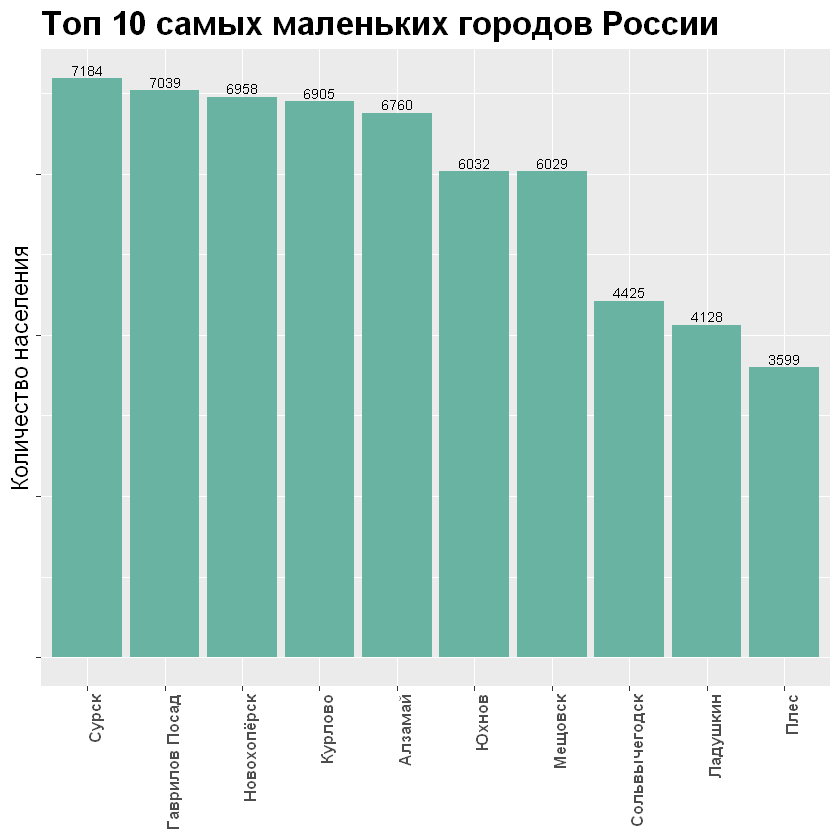

In [15]:
# Топ 10 самых маленьких городов по населению
res <- aggregate(Fact ~ City, df, FUN = max)
res <- res[order(res$Fact), ][1:10, ]; names(res)[2] <- "Fact"

ggplot(res, aes(x = reorder(City, -Fact),
                y = Fact)) + 
  geom_bar(stat = "identity", fill = "#69b3a2") + 
  ggtitle("Топ 10 самых маленьких городов России") + 
  my_theme + 
  theme(axis.title.x = element_blank(),
        axis.text.x = element_text(angle = 90, hjust = 1, face = "bold"),
        axis.text.y = element_blank()) + 
  geom_text(aes(label=Fact), vjust=-0.3, size=3) +
  ylab("Количество населения")

## Изменение демографии населения по годам

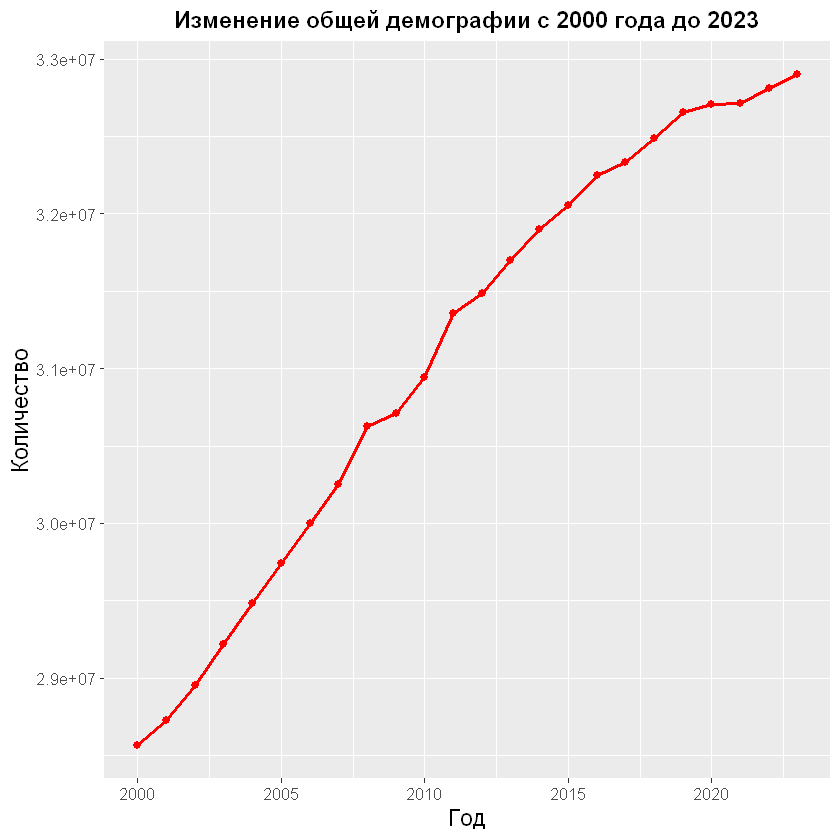

In [24]:
ggplot(present_df, aes(Year, Fact)) + 
 stat_summary(fun.y = "sum", geom = "point", colour = "red", size = 2, na.rm = T) + 
 stat_summary(fun.y = "sum", geom = "line", colour = "red", size = 1, na.rm = T) + 
 scale_x_continuous(breaks= pretty_breaks()) + 
 my_theme + theme(plot.title = element_text(hjust = 0.5, size = 14, face = "bold")) + 
 ggtitle("Изменение общей демографии с 2000 года до 2023") + 
 xlab("Год") + ylab("Количество")

## Проверка данных населения на нормальность распределения сгруппированная по годам

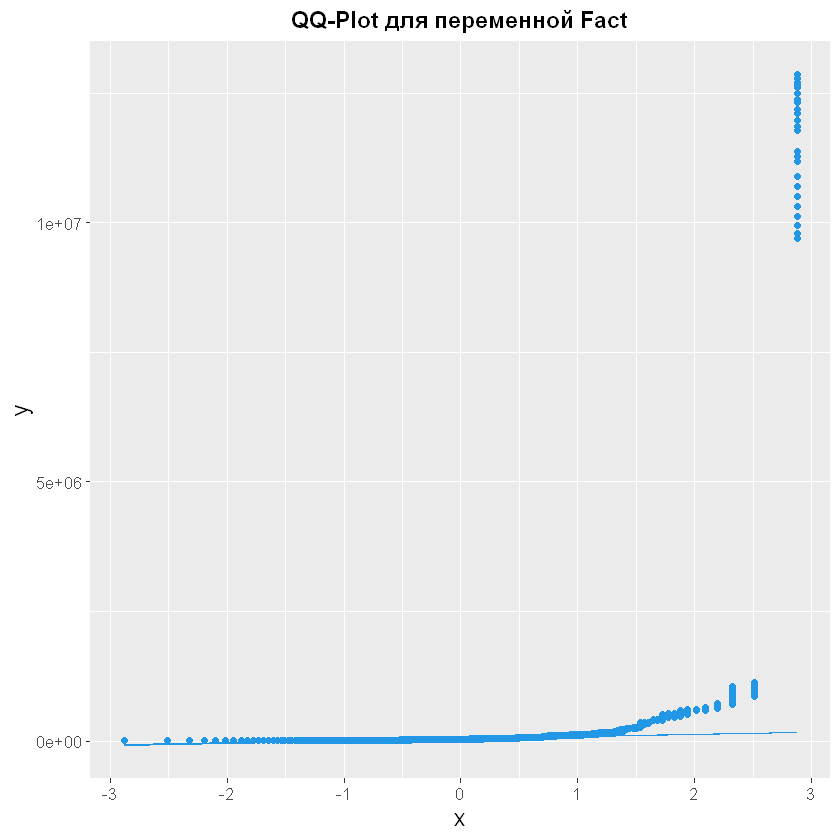

In [17]:
ggplot(present_df, aes(sample = Fact, group = Year)) +
  stat_qq(na.rm = T, color = 4) +
  stat_qq_line(na.rm = T, color = 4) + 
  my_theme + theme(plot.title = element_text(hjust = 0.5, size = 14, face = "bold")) + 
  ggtitle("QQ-Plot для переменной Fact")

In [18]:
test <- shapiro.test(aggregate(Fact ~ Year, present_df, sum)[, 2])
if (test$p.value > 0.05) {
    print("Данные имеют нормальное распределение")
} else {
    print("Данные не соответствуют нормальному закону распределения")
}

[1] "Данные не соответствуют нормальному закону распределения"


# Статистический анализ данных

**По графикам, представленным выше, можно точно сказать, что**  

**Топ 5 самых населенных городов России**:
1. Москва;
2. Уфа;
3. Краснодар;
4. Тольятти;
5. Ульяновск.
  
**Топ 5 самых ненаселенных городов России**:
1. Алзамай;
2. Курлово;
3. Новохоперск;
4. Гаврилов Посад;
5. Сурск.
  
- *Данные фактического населения, сгруппированные по годам, не имеют нормальное распределение.*
- *C 2000 по 2023 год наблюдается общий демографичесий рост, если заполнить пропуски значений ср. арифм. значениями населения для города.*

## Выводы по визуализации
1. Данные по численности населения очевидно не учитывают последствия COVID-2019 и СВО с 2022 года.
2. Самые большие города - находятся в центральной России, где в целом умеренный климат. Маленькие города находятся ближе к Восточной Сибири, например, Алзамай. Погода суровее, чем в центральной России. Как вариант, климат влияет на кол-во людей, которое проживает в городе.

## Проверка гипотез

### Гипотезы
1. Более 1/4 населения страны проживает в Москве в 2023 году.
2. За 2019 год численность населения упала более чем на 10% по сравнению с предыдущим годом. - Последствия COVID-2019
3. За 2022 год наблюдается отток населения из больших городов более чем на 5%. - Влияние СВО.

Найдем кол-во населения во всех городах вместе по годам

In [19]:
year_sum_amount <- as.data.frame(present_df %>% group_by(Year) %>% summarise(sum_fact = sum(Fact)))

### Гипотеза №1

In [20]:
# Более 1/4 населения страны проживает в Москве в 2023 году.
Moscow_amount <- subset(present_df, City == "Москва" & Year == 2023)$Fact
res <- (Moscow_amount / year_sum_amount$sum_fact[year_sum_amount$Year == 2023]) * 100
if (res > 25) {
    print("В Москве действительно проживает более 1/4 населения России в 2023 году.")
} else {
    print("В Москве проживает менее 1/4 населения России в 2023 году.")
}

[1] "В Москве действительно проживает более 1/4 населения России в 2023 году."


### Гипотеза №2

In [21]:
# За 2019 год численность населения упала более чем на 10% по сравнению с предыдущим годом. - Последствия COVID-2019
res <- year_sum_amount[year_sum_amount$Year %in% c(2018, 2020), ]
# На сколько изменилось кол-во человек за 2019 год в городах суммарно 
result <- res$sum_fact[2] - res$sum_fact[1]

# Проверка гипотезы
if (abs(result) > (0.1 * res$sum_fact[1])) {
    print("За 2019 год численность населения упала более чем на 10% по сравнению с предыдущим годом в результате COVID-2019")
} else {
    print("За 2019 год население не упало более чем на 10%, нельзя утверждать, что COVID-2019 как то вмешался в общую демографию по стране.")
}

[1] "За 2019 год население не упало более чем на 10%, нельзя утверждать, что COVID-2019 как то вмешался в общую демографию по стране."


### Гипотеза №3

In [22]:
# За 2022 год наблюдается отток населения из больших городов более чем на 5%. - Влияние СВО.

# Оставим только 5 наибольших городов по населению в данных
# Топ 5 самых больших городов
res <- aggregate(Fact ~ City, df, FUN = max)
res <- res[order(res$Fact, decreasing = T), ][1:5, ]; names(res)[2] <- "Fact"

# Получим список городов и отфильтруем основные данные
top_5_names <- res$City

data_with_5_cities <- subset(present_df, City %in% top_5_names)
res <- as.data.frame(data_with_5_cities %>% group_by(Year) %>% summarise(sum_fact = sum(Fact)))

`geom_smooth()` using formula = 'y ~ x'


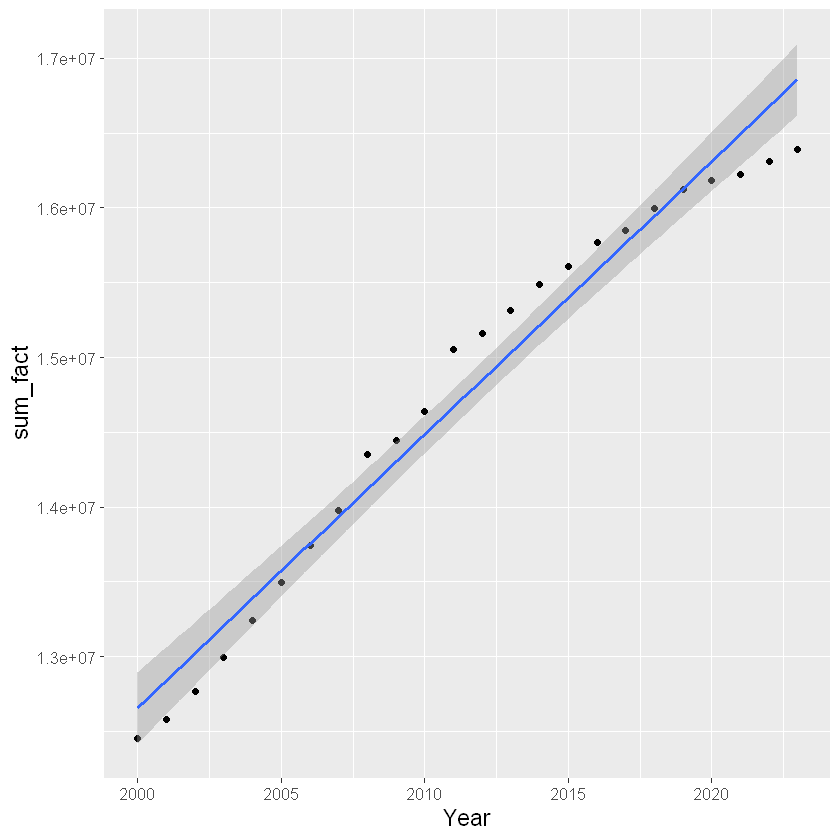

In [23]:
# Линия тренда населения по 5 городам
ggplot(res, aes(x = Year, y = sum_fact)) + 
    my_theme + 
    geom_point() + 
    geom_smooth(method = "lm", level = 0.98)

По графику видно отчетливо, что линия тренда строго возрастающая. То есть никакого оттока из крупных городов нет. Но опять же данный вывод исходит только из имеющейся полноты данных.

## Выводы по гипотезам

1. В Москве действительно проживает более 1/4 населения России в 2023 году.
2. За 2019 год население не упало более чем на 10%, нельзя утверждать, что COVID-2019 как то вмешался в общую демографию по стране.
3. За 2022 год не наблюдается оттока населения из больших городов более чем на 5%. - Влияние СВО.